# Unsupervised machine learning: Clustering

## Content
1. Import data and libraries
2. Preparing data
3. The elbow technique
4. k-means clustering
5. Scatterplots of clustered data
6. Descriptive statistics for clusters

## 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Option for created graphs to be displayed automatically
%matplotlib inline

In [3]:
# Turn project folder path into a string
path = r'C:\Users\Lara\Career Foundry Projects\Wake County Housing Market 2023'

# Import csv data file using os library
df = pd.read_csv (os.path.join(path, 'Data','Prepared Data', 'single_homes_new.csv'), index_col = False)

In [4]:
df.shape

(306560, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306560 entries, 0 to 306559
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   real_estate_id           306560 non-null  int64  
 1   deeded_acreage           306560 non-null  float64
 2   total_sale_price         306560 non-null  int64  
 3   assessed_building_value  306560 non-null  int64  
 4   assessed_land_value      306560 non-null  int64  
 5   year_built               306560 non-null  int64  
 6   units                    306560 non-null  int64  
 7   heated_area              306560 non-null  int64  
 8   utilities                306560 non-null  object 
 9   addition_year            306560 non-null  int64  
 10  effective_year           306560 non-null  int64  
 11  remodeled_year           306560 non-null  int64  
 12  story_height             306560 non-null  object 
 13  design_style             306560 non-null  object 
 14  bath

In [6]:
df.head(10)

,real_estate_id,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,year_built,units,heated_area,utilities,addition_year,...,house_age,effective_age,price_group,value_group,house_size,house_age_group,effective_age_group,sale_month,sale_year,sale_month_year
0,19,0.21,34500,134321,115000,1964,1,1828,ALL,0,...,59,43,Low price,Low value,Medium house,Old house,Effective mid-age house,1,1974,01/1974
1,20,0.46,35500,114933,45000,1970,1,1240,E,0,...,53,38,Low price,Low value,Small house,Old house,Effective mid-age house,5,1983,05/1983
2,22,0.46,37500,118723,32000,1900,1,2261,WSE,0,...,123,63,Low price,Low value,Medium house,Very old house,Effective old house,9,2004,09/2004
3,25,0.96,70000,358290,140000,1971,1,3770,WGE,0,...,52,52,Low price,Middle value,Big house,Old house,Effective old house,1,1971,01/1971
4,30,0.47,380000,161077,303875,1946,1,1789,ALL,2020,...,77,43,Middle price,Low value,Medium house,Old house,Effective mid-age house,8,2015,08/2015
5,31,0.39,337500,273621,200000,1970,1,2463,ALL,0,...,53,18,Middle price,Middle value,Medium house,Old house,Effective mid-age house,7,2002,07/2002
6,33,0.50,32500,185581,138000,1969,1,2389,WGE,0,...,54,43,Low price,Low value,Medium house,Old house,Effective mid-age house,2,1979,02/1979
7,34,0.70,19500,126849,79200,1968,1,1280,ALL,0,...,55,55,Low price,Low value,Small house,Old house,Effective old house,1,1968,01/1968
8,35,0.49,319000,503301,469300,1938,1,4650,ALL,0,...,85,43,Middle price,Middle value,Big house,Old house,Effective mid-age house,1,1996,01/1996
9,37,0.13,425000,203178,300000,1921,1,1890,ALL,0,...,102,43,Middle price,Middle value,Medium house,Very old house,Effective mid-age house,4,2008,04/2008


## 2. Preparing data

I will create a subset that contains only specific numerical variables, not all. Because not all numerical variables are valuable for analysis, like real_estate_id or units. Also I will not use year of addition or remodeling and I'll use 2 variables describing age of house and effective age and not year built or effective year.


In [7]:
df.columns

Index(['real_estate_id', 'deeded_acreage', 'total_sale_price',
       'assessed_building_value', 'assessed_land_value', 'year_built', 'units',
       'heated_area', 'utilities', 'addition_year', 'effective_year',
       'remodeled_year', 'story_height', 'design_style', 'bath', 'city',
       'zip_code', 'house_age', 'effective_age', 'price_group', 'value_group',
       'house_size', 'house_age_group', 'effective_age_group', 'sale_month',
       'sale_year', 'sale_month_year'],
      dtype='object')

In [8]:
sub = df [['deeded_acreage', 'heated_area', 'house_age', 'effective_age', 'sale_year', 'total_sale_price',
            'assessed_building_value', 'assessed_land_value', 'zip_code']]

## 3. The elbow technique

In [9]:
# Define range for potential clusters
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [10]:
# Create scores for each variation of proposed number of clusters
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))]

score

C:\Users\Lara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

[-2.4068115680162076e+16,
 -1.3015173087345466e+16,
 -9162974126810708.0,
 -7189549966105112.0,
 -6214245744986328.0,
 -5317228946276700.0,
 -4696752782099085.0,
 -4253203570560584.0,
 -3845985932127846.0]

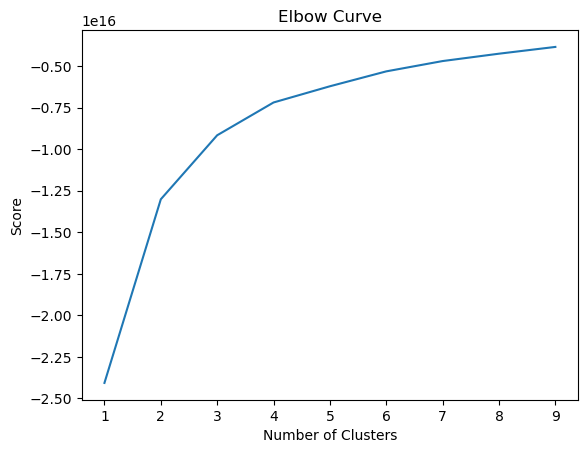

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Comment:
Curve somewhat flattens after number 4, which indicates that this is the optimal number of clusters.

## 4. k-means clustering

In [12]:
# Create the k-means object and fit it to the data
kmeans = KMeans(n_clusters = 4) 
kmeans.fit(sub)

C:\Users\Lara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [13]:
# Create new column 'custers'
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\Lara\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lara\AppData\Local\Temp\ipykernel_21948\1441273650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [14]:
sub.head(10)

,deeded_acreage,heated_area,house_age,effective_age,sale_year,total_sale_price,assessed_building_value,assessed_land_value,zip_code,clusters
0,0.21,1828,59,43,1974,34500,134321,115000,27610,3
1,0.46,1240,53,38,1983,35500,114933,45000,27610,3
2,0.46,2261,123,63,2004,37500,118723,32000,27591,3
3,0.96,3770,52,52,1971,70000,358290,140000,27613,3
4,0.47,1789,77,43,2015,380000,161077,303875,27607,0
5,0.39,2463,53,18,2002,337500,273621,200000,27615,0
6,0.50,2389,54,43,1979,32500,185581,138000,27607,3
7,0.70,1280,55,55,1968,19500,126849,79200,27606,3
8,0.49,4650,85,43,1996,319000,503301,469300,27608,0
9,0.13,1890,102,43,2008,425000,203178,300000,27604,0


In [15]:
sub['clusters'].value_counts()

clusters
3    147066
0    117703
2     38121
1      3670
Name: count, dtype: int64

#### Comment:
Cluster number 3 has a lot less values than other three clusters. 

## 5. Scatterplots of clustered data

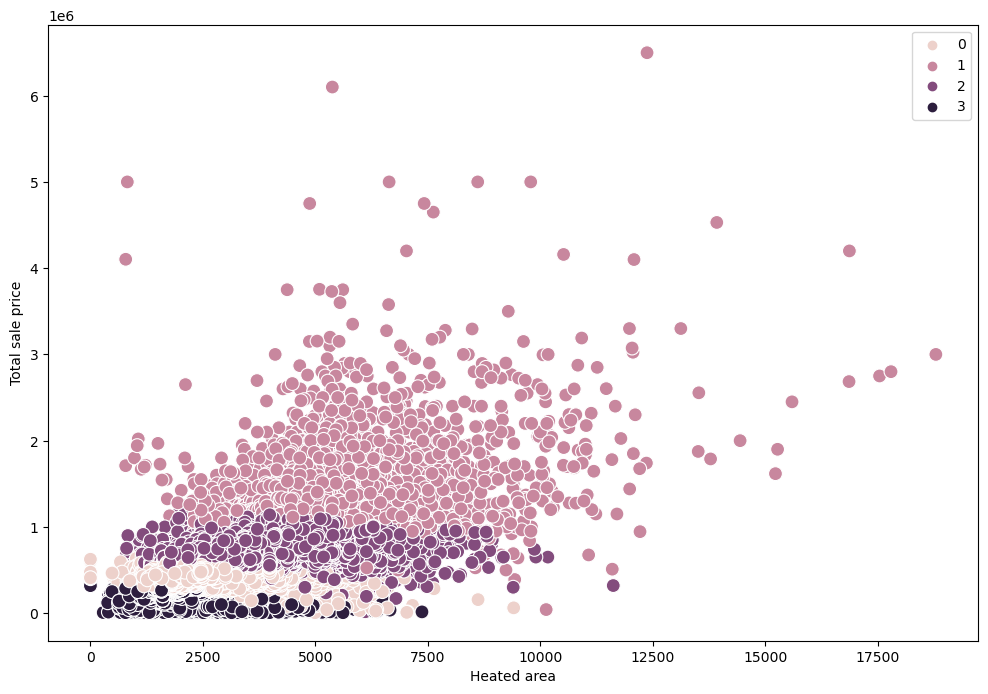

In [16]:
# Plot the clusters for the 'total_sale_price' and 'heated_area' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = sub['heated_area'], y = sub['total_sale_price'], hue = kmeans.labels_, s = 100) 
ax.grid(False)
plt.xlabel('Heated area')
plt.ylabel('Total sale price')
plt.show()

It looks like 3 shades of pink/purple clusters (0, 1 and 2) represent houses that were sold for less than approximatelly 1.2 million (M). But black cluster (number 3) has some houses that were sold for less than 1.2 M, but are larger than 5000 sq ft. It is clear that this cluster represent the most expensive houses, with few that are a bit cheaper but larger than n=normal houses. I set 2 M to be a condition that will group the most expensive houses, but here algorithm set it at around 1.2 m.

There are about 300,000 points here so a lot are not even visible, but I can noticed similar pattern for other clusters too.

Pink (cl. num. 0): Mostly houses that were sold for about 600 K to 1.2 M and smaller than 4500 sq ft or cheaper than 500 K and bigger than 4500 sq ft and up to 11000 sqft

Purple (cl. num. 1):  Mostly houses that were sold for about 300 K to 600 M and smaller than 3000 sq ft or cheaper than 300 K and bigger than 3000 sq ft and up to 9000 sq ft.

Dark purple (cl. num. 2): Mostly houses that were sold for less than 300 K and all are smaller than 7500 sq ft.

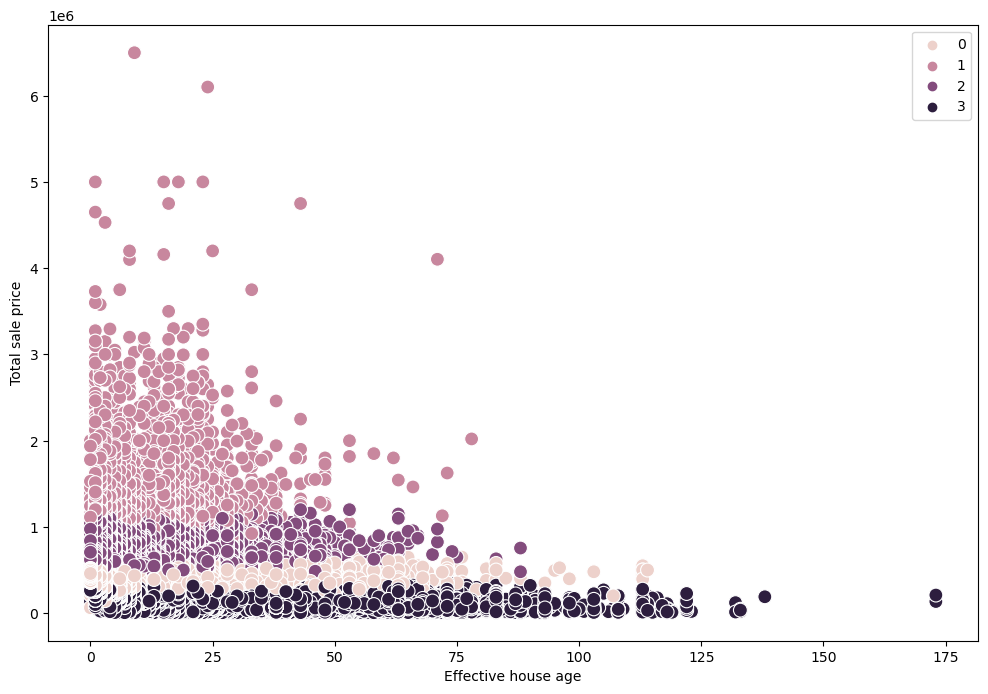

In [17]:
# Plot the clusters for the 'total_sale_price' and 'effective_age' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = sub['effective_age'], y = sub['total_sale_price'], hue = kmeans.labels_, s = 100) 
ax.grid(False)
plt.xlabel('Effective house age')
plt.ylabel('Total sale price')
plt.show()

I chose to use effective age here to take into account the fact that sometimes old houses have such a good construction that can be valued the same as a=some less older houses.

Again, black cluster represents the houses that are more expensive, mostly over 1 million, but less than 80 year effectivelly old. Other clusters seem to divide almost with a straight line houses by price.

If I don't look into dots that are a bit far away from others from the sam ecluster, I can almost deduce this:

Houses with effective age (ef. age) 0-110 years cost up to 300K, 0-75 ef. age cost 300K - 600K, 0-50 ef.age 600K - 1.2M, and houses with ef. age less than 30 cost more than 1.2M.

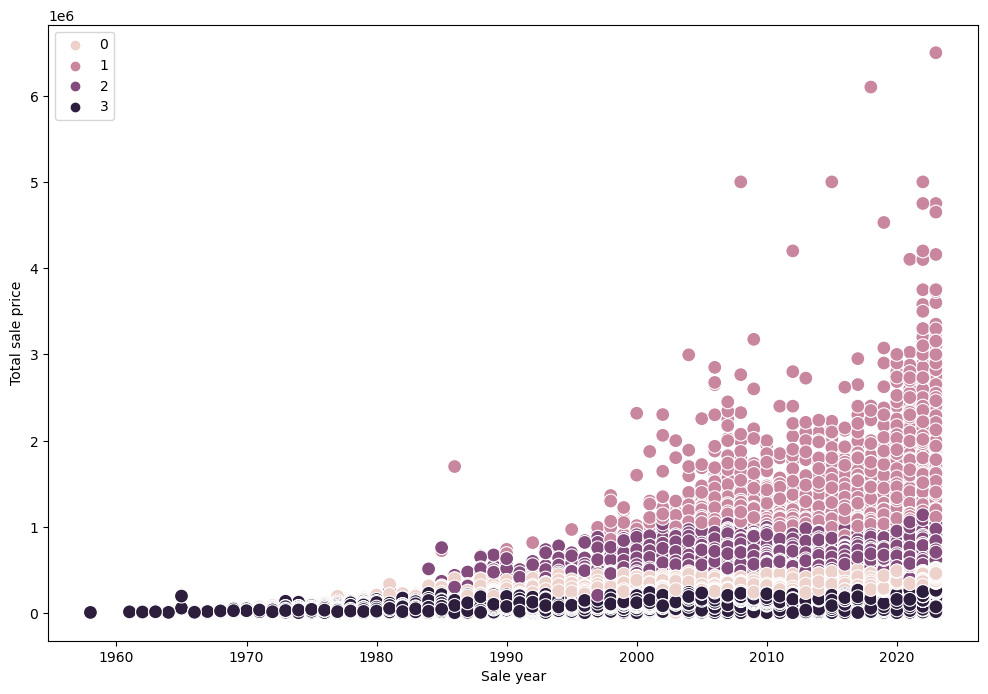

In [18]:
# Plot the clusters for the 'total_sale_price' and 'sale_year' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = sub['sale_year'], y = sub['total_sale_price'], hue = kmeans.labels_, s = 100) 
ax.grid(False)
plt.xlabel('Sale year')
plt.ylabel('Total sale price')
plt.show()

In some way his scatterpot shows how prices of house changed a lot over the years and that with few exceptions house were sold for over 900 k only since the start of 21st century. 

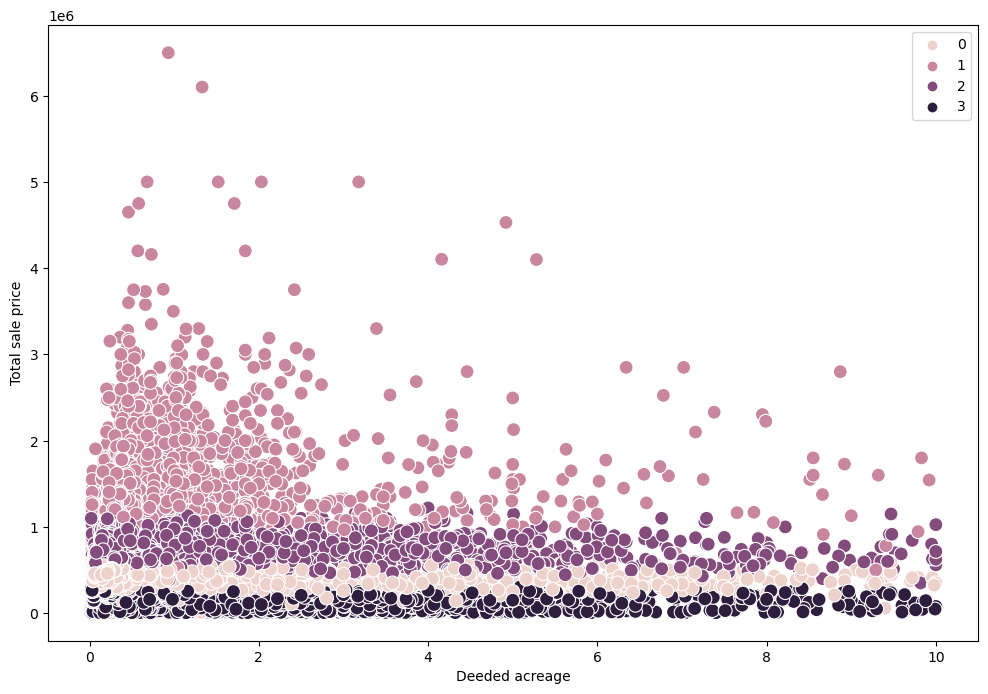

In [19]:
# Plot the clusters for the 'total_sale_price' and 'deeded_acreage' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = sub['deeded_acreage'], y = sub['total_sale_price'], hue = kmeans.labels_, s = 100) 
ax.grid(False)
plt.xlabel('Deeded acreage')
plt.ylabel('Total sale price')
plt.show()

All 3 purple hued clusters (numbers 0, 1 and 2) shows that for any price of the house lot can be any size in the range from dataset (that is from 0.01 to 10 acres), but black cluster (number 3) shows majority of dots in the area that indicates lot size smaller than 2 acreas. It looks like i can almost conclude that "Most houses that cost 1.2M to 3M have lots smaller than 2 acres"

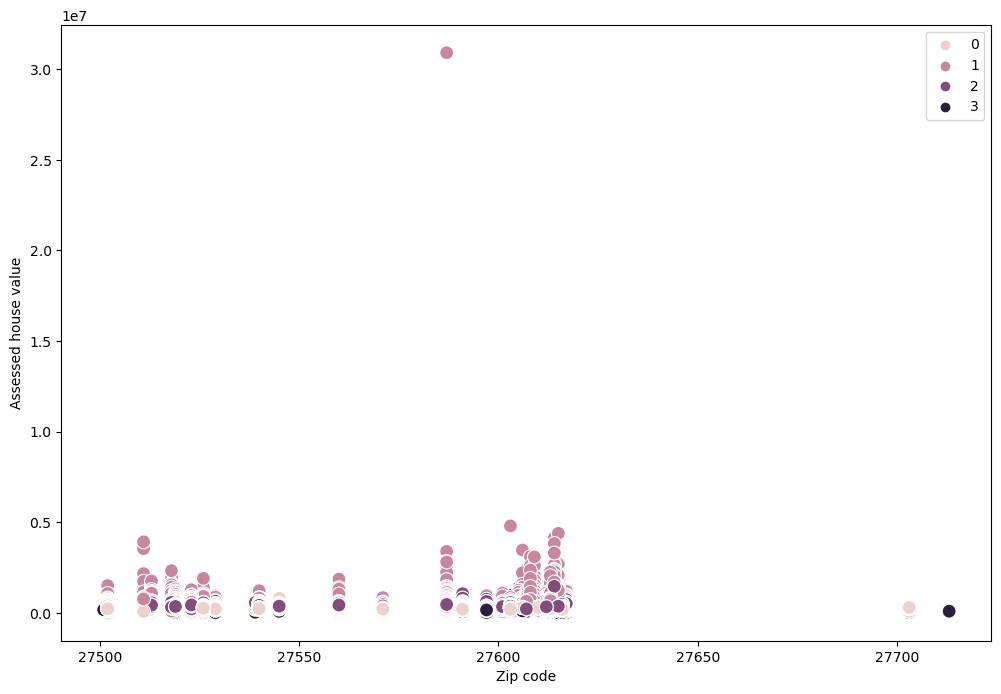

In [20]:
# Plot the clusters for the 'zip_code' and 'assessed_building_value' variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = sub['zip_code'], y = sub['assessed_building_value'], hue = kmeans.labels_, s = 100) 
ax.grid(False)
plt.xlabel('Zip code')
plt.ylabel('Assessed house value')
plt.show()

This Scatterplot shows that these pair of variables is not really suitable for comparison. Any other variable compared to zip codes would probably render similar plot. this was expeted, but i wanted to see how algorithm will cluster by zip codes.

#### Conclusion for all scatter plots:
I did grouped all house by price into 4 groupsvalues are represented in column 'price_groups' with a bit different conditions than horw algorithm clustered them. It looks like majority od dots in each of the 4 clusters actually represent a price group, with some exceptions. In parenthesis I put approximate conditions for clusters and real conditions for price groups to compare algorithm and my own division into 4 groups.

dark purple (<300K) - Low price (<200K)

purple (300K-600K) - Middle price (200K-800K)

pink (600K-1.2 M) -  High price (800K-2M)

black (>1.2 M) - Very high price (>2M)

In [21]:
# Frequency of price groups
df['price_group'].value_counts()

price_group
Middle price       197486
Low price           99856
High price           8915
Very high price       303
Name: count, dtype: int64

## 6. Descriptive statistics for clusters

In [22]:
# Rename clusters from numbers to colors
sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Lara\AppData\Local\Temp\ipykernel_21948\1840996600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 3, 'cluster'] = 'black'


In [23]:
sub['cluster'].value_counts()

cluster
black          147066
pink           117703
dark purple     38121
purple           3670
Name: count, dtype: int64

In [24]:
sub.columns

Index(['deeded_acreage', 'heated_area', 'house_age', 'effective_age',
       'sale_year', 'total_sale_price', 'assessed_building_value',
       'assessed_land_value', 'zip_code', 'clusters', 'cluster'],
      dtype='object')

In [25]:
# Group by each cluster and aggregate to calculate mean and median
sub.groupby('cluster').agg({'deeded_acreage':['mean', 'median'], 
                         'heated_area':['mean', 'median'], 
                         'house_age':['mean', 'median'],
                          'effective_age':['mean', 'median'],
                           'sale_year':['mean', 'median'],
                           'total_sale_price':['mean', 'median'],
                           'assessed_building_value':['mean', 'median'],
                          'assessed_land_value':['mean', 'median']})

deeded_acreage         heated_area          house_age         \
                      mean median         mean  median       mean median   
cluster                                                                    
black             0.336170  0.220  1713.416480  1642.0  33.259115   29.0   
dark purple       0.541130  0.320  3695.776475  3592.0  17.763306   15.0   
pink              0.365624  0.230  2577.880436  2553.0  20.335268   18.0   
purple            0.907896  0.565  5415.490191  5029.0  18.650136   15.0   

            effective_age           sale_year         total_sale_price  \
                     mean median         mean  median             mean   
cluster                                                                  
black           29.818415   27.0  2006.948472  2009.0     1.648438e+05   
dark purple     13.877600   13.0  2017.265261  2019.0     6.512210e+05   
pink            17.444602   17.0  2015.229773  2018.0     3.651545e+05   
purple          12.673569   12.0  2018.664305  2021.0     1.397282e+06   

                       assessed_building_value           assessed_land_value  \
                median                    mean    median                mean   
cluster                                                                        
black         166000.0           168573.267173  165020.5        70080.541335   
dark purple   625000.0           463403.490097  456558.0       145096.129430   
pink          356000.0           287387.359277  284214.0        88435.741893   
purple       1275000.0           882106.094823  801085.0       305408.239510   

                       
               median  
cluster                
black         50000.0  
dark purple  118408.0  
pink          75000.0  
purple       250000.0

Huge difference between mean and median for 'deeded_acreage' shows that in every cluste rthere are very big outliers.

Dark purple cluster has the "oldest" houses, because mean an dmedian are much bigger that for other 3 clusters. In both columns : house-age and effective_age.

Median and mean for sale_year in all clusters confirm the conclusion that majoruty of houses were sold in 21st century (after 2001).

When I compare mean and median in 2 columns 'assessed_building_value' (value) and 'total_sale_price' (price) I can see that they show that on average low value house were sold for pretty much the same price (dark purple cl.), midlle valued house were sold on average for 100K more (purple cl.), high valued houses were sold on average for 200K more (pink cl.) and very high valed houses were sold on average for 500-600K more (black cl.)


In [26]:
# Descriptive stat for just 4 variables
# Calculate min, mean and max
sub.groupby('cluster').agg({'total_sale_price':['min', 'mean', 'max'],
                            'heated_area':['min', 'mean', 'max'],
                            'effective_age':['min', 'mean', 'max'],
                            'deeded_acreage':['min', 'mean', 'max']})

total_sale_price                        heated_area               \
                         min          mean      max         min         mean   
cluster                                                                        
black                   5000  1.648438e+05   378200           0  1713.416480   
dark purple            16500  6.512210e+05  1229000         800  3695.776475   
pink                    5000  3.651545e+05   670000           0  2577.880436   
purple                 41500  1.397282e+06  6498000         783  5415.490191   

                   effective_age                 deeded_acreage            \
               max           min       mean  max            min      mean   
cluster                                                                     
black         7368             0  29.818415  173           0.01  0.336170   
dark purple  11619             0  13.877600   89           0.02  0.541130   
pink          9406             0  17.444602  114           0.01  0.365624   
purple       18789             0  12.673569   78           0.02  0.907896   

                    
               max  
cluster             
black        10.00  
dark purple  10.00  
pink         10.00  
purple        9.92

In [29]:
# Calculate min, mean and max for same 4 variables for entire dataset
df.agg({'total_sale_price':['min', 'mean', 'max'],
                            'heated_area':['min', 'mean', 'max'],
                            'effective_age':['min', 'mean', 'max'],
                            'deeded_acreage':['min', 'mean', 'max']})

,total_sale_price,heated_area,effective_age,deeded_acreage
min,5.000000e+03,0.000000,0.000000,0.01000
mean,3.169883e+05,2336.153161,22.880014,0.37981
max,6.498000e+06,18789.000000,173.000000,10.00000


## Conclusion

#### What could these results be useful for and possible next steps.

Division into these 4 clusters (mainly by total sale price with some exceptions) could be helpful when exploring connections between price and certain attributes of the house such as size, age, lot size. It wasn't helpful with zip codes.
It would be more insightful perhaps to plot 3D plots of let's say price, age and size to see how clusters would be plotted.

From analysis so far, I can only deduce that there is no "one size fits all" or groups or clusters or any other simple division of data, or houses to be precise into meaningful groups. Every group has large outliers, exceptions to "the rule" or something that doesn't fit.

On the elbow graph there is still a slight rise from 4 to 6 and a bit more flattening after6. Maybe it would be helpful to explore if clustering into 6 clusters would show something more interesting. Also, some variables should be removed, like 'zip_code'.

Analyzing the house market, house prices and predicting house prices is indeed a very difficult and complicated task with a lot of different factors that affect the price.

Again, I will point out that there is a measure bias in my data because prices of houses are somewhat impossible to compare in this format. For example : house sold for 100,000 in 1970 would be comparable to house sold for about 790,000 in 2023. Next step would be to adjust all prices with most recent available CPI (consumer price index).


## 7. Export data

In [27]:
# Export subset sub as csv file
sub.to_csv(os.path.join(path, 'Data','Prepared Data', 'subset_with_clusters.csv'), index = False)